In [1]:
import pyspark

spark = pyspark.sql.SparkSession.builder.appName('pyspark - map maker').getOrCreate()
sc = spark.sparkContext

In [2]:
import os
import pandas
data_folder = "../states"

bigdf = None
for year in range(1916, 2025, 4):
    if year == 1976: #no data for 1976
        continue
    df = spark.createDataFrame(pandas.read_csv(f"{data_folder}/{year}.csv"))
    if bigdf == None:
        bigdf = df
    else:
        bigdf = bigdf.union(df)


[Row(state='Alabama', total_votes=131142, dem_votes=99409, dem_pct=75.6, dem_ev=12.0, rep_votes=28809, rep_pct=21.9, rep_ev=nan, year=1916), Row(state='Arizona', total_votes=58019, dem_votes=33170, dem_pct=57.2, dem_ev=3.0, rep_votes=20522, rep_pct=35.4, rep_ev=nan, year=1916), Row(state='Arkansas', total_votes=168348, dem_votes=112186, dem_pct=66.6, dem_ev=9.0, rep_votes=47148, rep_pct=28.0, rep_ev=nan, year=1916), Row(state='California', total_votes=999250, dem_votes=465936, dem_pct=46.6, dem_ev=13.0, rep_votes=462516, rep_pct=46.3, rep_ev=nan, year=1916), Row(state='Colorado', total_votes=294375, dem_votes=178816, dem_pct=60.5, dem_ev=6.0, rep_votes=102308, rep_pct=34.8, rep_ev=nan, year=1916)]


In [11]:
print(bigdf.count())

1356


TypeError: len() of unsized object

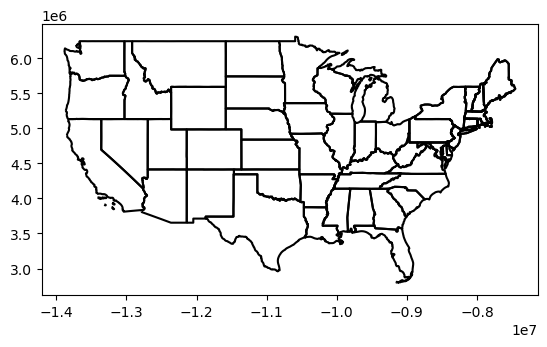

In [36]:
import geopandas
import pandas

states = geopandas.read_file("../geopandas-tutorial/data/usa-states-census-2014.shp")
states = states.to_crs("EPSG:3395")

state_text_path = "../states.txt"

f = open(state_text_path)
state_names = f.readlines()
for year in range(1916, 1917, 4):
    if year == 1976:
        continue
    map = states.boundary.plot(color="black")
    df = pandas.read_csv(f"{data_folder}/{year}.csv")
    for state in state_names:
        state = state.strip()
        filtered = df.filter(df.state == state)
        states[states['NAME'] == state].plot(ax=map, color="yellow")
        #print(row)
    